$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 1: Linear Regression

Daniel Ball

## Overview

For this assignment, we are formulating linear regressions of data. This creates a linear model for a statistic based on a real data set. In the case of this experiment, we wish to create a model which the age of male abalone based on its weight. After finding a linear fit, it is also good to determine how well our approximation fits the data; for this we use the root mean square error (RMSE), which compares the actual value to the value predicted by our regression. Smaller values indicate smaller residuals and therefore a better fit. Thus the goal for our algorithm is to minimise the RMSE to maximize the accuracy of the model.

## Method

The simplest (non-constant) model for a set of data is an affine(linear + constant) model. In a 2 dimensional space, this can be expressed in slope intercept form: $y = mx + b$. Extending to $n$ dimensional space, this becomes $y = b + m_1x_1 +  m_2x_2 + ... + m_nx_n$. We can view this as the dot product of two vectors; the input vector $\vec{x}$ and a weights vector $\vec{w}$. 


Include latex math formulas defining the formula that is being minimized, and the matrix calculation for finding the weights.  Define in code cells the following functions as discussed in class.  Your functions' arguments and return types must be as shown here.

  * ```model = train(X,T)```
  * ```predict = use(model,X)```
  * ```error = rmse(predict,T)```
  
Let ```X``` be a two-dimensional matrix (```np.array```) with each row containing one data sample, and ```T``` be a two-dimensional matrix of one column containing the target values for each sample in ```X```.  So, ```X.shape[0]``` is equal to ```T.shape[0]```.  Function call ```train(X,T)``` must return a dictionary with the keys ```means```, ```stds```, and ```w```.

In [222]:
# Set up numpy and pyplot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
np.set_printoptions(suppress=True)
%matplotlib inline
%precision 3

'%.3f'

In [223]:
'''
Returns standard deviation, means, and weights for each column in X
X: 2D matrix of input data
T: 2D matrix of one column containing target values for X
'''
def train(X,T):
    means = np.mean(X,axis=0)
    stds = np.std(X,axis=0)
    Xs = (X - means) / stds
    Xs1 = np.hstack((np.ones((Xs.shape[0],1)), Xs))                
    w = np.linalg.lstsq( np.dot(Xs1.T,Xs1), np.dot(Xs1.T, T) )[0]
#     result = {}
#     Xmean = X.mean(axis=0)
#     Xstd =  X.std(axis=0) 
#     X = np.hstack((np.ones((X.shape[0],1)), X)) # add column for bias
#     Xs = (X - X.mean(axis=0)) / X.std(axis=0)
#     result['w'] = np.linalg.lstsq(np.dot(X.T,X), np.dot(X.T, T))[0]
#     result['means'] = Xmean
#     result['stds'] = Xstd
    return {'means': means, 'stds': stds, 'w': w}

In [224]:
model = train(np.array([[1,2],[3,4],[5,6]]), np.array([[9,2],[3,4],[5,6]]))
for k,v in model.items():
    print('{:5s}: {}'.format(k,v))

stds : [ 1.633  1.633]
means: [ 3.  4.]
w    : [[ 5.667  4.   ]
 [-0.816  0.816]
 [-0.816  0.816]]


In [249]:
'''
X is an input data set to which we wish to apply the model
model is a dictionary containing:
    'w': weights for the model
    'stds': standard deviations for each column in the model
    'means': means for each column in the model
'''
def use(model, X):
    # standardize the input matrix X based on the model's mean and standard deviation
    Xs = (X - model['means']) / model['stds']    
    # add the vector of 1's for the bias
    Xs1 = np.hstack((np.ones((Xs.shape[0],1)), Xs))
    
    # apply the model and return the resulting vector
    # each index in the vector is a prediction for the age for the corresponding row in X
    prediction = np.dot(Xs1, model['w'])
    return prediction

In [252]:
def rmse(predict, T):
    return np.sqrt( np.mean( (predict - T)**2))

## Data

### Source

The data chosen is Abalone Data from the <a href="http://archive.ics.uci.edu/ml/datasets/Abalone">UC Irvine Machine Learning Repository</a>. The data set originated from a prior study by Nash et. al[1].

<table>
<tr><th>Name</th> <th>Data Type</th> <th>Meas.</th> <th>Description</th></tr>
<tr><td>Sex				</td><td>nominal	</td><td>		</td><td>M, F, and I (infant)</td></tr>
<tr><td>Length			</td><td>continuous	</td><td>mm		</td><td>Longest shell measurement</td></tr>
<tr><td>Diameter		</td><td>continuous	</td><td>mm		</td><td>perpendicular to length</td></tr>
<tr><td>Height			</td><td>continuous	</td><td>mm		</td><td>with meat in shell</td></tr>
<tr><td>Whole weight	</td><td>continuous	</td><td>grams	</td><td>whole abalone</td></tr>
<tr><td>Shucked weight	</td><td>continuous	</td><td>grams	</td><td>weight of meat</td></tr>
<tr><td>Viscera weight	</td><td>continuous	</td><td>grams	</td><td>gut weight (after bleeding)</td></tr>
<tr><td>Shell weight	</td><td>continuous	</td><td>grams	</td><td>after being dried</td></tr>
<tr><td>Rings			</td><td>integer	</td><td>		</td><td>+1.5 gives the age in years</td></tr>
</table>

I use the Rings, Whole weight, Shucked Weight, Viscera Weight, and Shell Weight as my data. I restrict my samples to Male abalone, in the hopes that it will give a more uniform correlation between weight and rings.

Describe the data you use in your example application.  Mention the source, and the names and meanings of each attribute. Include some plots of the data. Describe some observations you make about the plots.

First, we pull in the data from the source, abalone.data. While the file is given the .data extension, examination shows it to be formatted as comma separated values. There are no missing or unusual values so there is no need for extra processing of the input.

We will use numpy.loadtxt to read the file. The gender column needs a converter to change the gender to a float. We need to create 3 new columns for gender as booleans. First we need to convert these to numbers when the file is read.

In [227]:
def genderCheck(gender):
    if ord(gender) == ord('M'):
        return 1
    if ord(gender) == ord('F'):
        return 2
    if ord(gender) == ord('I'):
        return 3
    return 0

The file is organized with data stored in row vectors and there is no header row, so we specify the comma delimiter and read the file.

Below is a sample of parsed data. We see that there are 4177 row vectors of length 6.

In [229]:
data

array([[  1.   ,   0.514,   0.225,   0.101,   0.15 ,  15.   ],
       [  1.   ,   0.226,   0.1  ,   0.049,   0.07 ,   7.   ],
       [  2.   ,   0.677,   0.257,   0.141,   0.21 ,   9.   ],
       ..., 
       [  1.   ,   1.176,   0.525,   0.287,   0.308,   9.   ],
       [  2.   ,   1.095,   0.531,   0.261,   0.296,  10.   ],
       [  1.   ,   1.948,   0.946,   0.377,   0.495,  12.   ]])

Now we modify the data, adding three rows with contents based on the gender column of the input. We need to:
- parse gender into three columns with a binary flag for each
- remove the gender column
- insert a column of ones for the bias weight
- add 1.5 to the rings column to get ages

In [230]:
# parse gender into three arrays of binary values
mMask = (data[:,0] == 1).reshape(-1,1)
fMask = (data[:,0] == 2).reshape(-1,1)
iMask = (data[:,0] == 3).reshape(-1,1)

In [231]:
# concatenate arrays with the the input data sliced to remove gender
pass1Data = np.hstack((mMask, fMask, iMask, data[:,1:]))

In [232]:
# add 1.5 to the rings column to get ages
pass2Data = pass1Data
pass2Data[:,7] += 1.5
pass2Data

array([[  1.   ,   0.   ,   0.   , ...,   0.101,   0.15 ,  16.5  ],
       [  1.   ,   0.   ,   0.   , ...,   0.049,   0.07 ,   8.5  ],
       [  0.   ,   1.   ,   0.   , ...,   0.141,   0.21 ,  10.5  ],
       ..., 
       [  1.   ,   0.   ,   0.   , ...,   0.287,   0.308,  10.5  ],
       [  0.   ,   1.   ,   0.   , ...,   0.261,   0.296,  11.5  ],
       [  1.   ,   0.   ,   0.   , ...,   0.377,   0.495,  13.5  ]])

In order to have a meaningful test of our model, we can't train to the whole sample set, so we split into train and test sets. But we also have another problem: There are three distinct categories that we want to train evenly on: infant, male, and female. So we will sort our input by these columns and pull 20% from each section for testing.

In [233]:
# pull ages into a target vector
ages = pass2Data[:,7]
ages

array([ 16.5,   8.5,  10.5, ...,  10.5,  11.5,  13.5])

In [234]:
pass3Data = pass2Data[:,:7]
pass3Data

array([[ 1.   ,  0.   ,  0.   , ...,  0.225,  0.101,  0.15 ],
       [ 1.   ,  0.   ,  0.   , ...,  0.1  ,  0.049,  0.07 ],
       [ 0.   ,  1.   ,  0.   , ...,  0.257,  0.141,  0.21 ],
       ..., 
       [ 1.   ,  0.   ,  0.   , ...,  0.525,  0.287,  0.308],
       [ 0.   ,  1.   ,  0.   , ...,  0.531,  0.261,  0.296],
       [ 1.   ,  0.   ,  0.   , ...,  0.946,  0.377,  0.495]])

In [254]:
names = ['bias', 'male', 'female', 'immature', 
         'whole', 'schucked', 'viscera', 'shell']

We can take a look at the data, plotting against age.

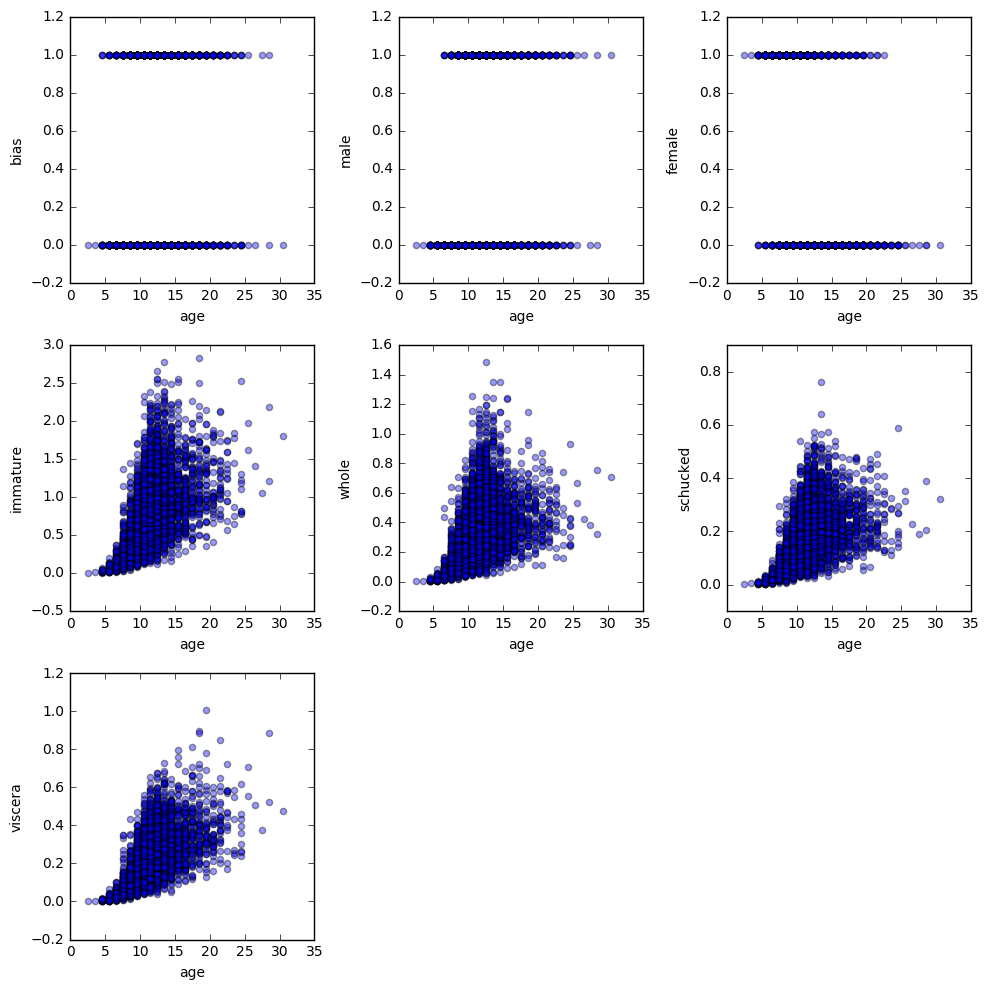

In [236]:
plt.figure(figsize=(10,10))
nrow,ncol = pass3Data.shape
for c in range(ncol):
    plt.subplot(3,3,c+1)
    plt.scatter(ages, pass3Data[:,c], alpha=0.4)
    plt.ylabel(names[c])
    plt.xlabel('age')
plt.tight_layout()

As one might expect, weights are very similar since they are various aspects of the same abalone. Gender plots show no useful information, since age and gender are largely uncorrelated and the values are binary. It is possible that the plots might show more of a trend if they were separated by gender.

The last thing to do is to concatenate a vector of 1s for the bias weight.

In [237]:
#add bias vector
pass4data = np.hstack((np.ones((pass3Data.shape[0],1)), pass3Data))

Now there is one final problem: in order to test our model, we don't want to use the same data for training and testing, otherwise the model will obviously fit perfectly and tell us nothing about data outside our sample. We can't simply use random values, because there are three distinct subsets of the data: Male, Female, and Infant. Let's first separate our input into three distinct matrices, which well will choose random rows from for training and testing, then concatenate the results. We can also plot these against age 

## Results

So how does our generated model fit the data? 

Show the values of the resulting weights and discuss which ones might be least relevant for fitting your linear model.  Remove them, fit the linear model again, plot the results, and discuss what you see.

## Grading

Your notebook will be run and graded automatically.  Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs480/notebooks/A1grader.tar) and extract `A1grader.py` from it. After running all of the above cells in your notebook, run the code in the following cell to demonstrate an example grading session.  You should see a perfect score of 100/100 if your functions are defined correctly.

In [253]:
%run -i "A1grader.py"

20/20 points. 'means' values are correct.
20/20 points. 'stds' values are correct.
20/20 points. 'w' values are correct.
20/20 points. Values returned by 'use' are correct.
20/20 points. rmse() is correct.
C:\git\jupyternotebooks\A1 Grade is 100/100


## Check-in

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/28803).

Grading will be based on 

  * correct behavior of the three functions listed above,
  * easy to understand plots in your notebook
  * readability of the notebook,
  * effort in making interesting observations, and in formatting your notebook.

#Sources

[1] Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994)
"The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait",
Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288) 
